In [1]:
#Linear Regression Without Sklearn
#Lets create a Fahrenheit prediction model where Celsius is Feature.
#Feature=input and Label=output

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
celsius_feature = np.arange(20,80)
fahren_label = (celsius_feature * 1.8) + 32

In [4]:
df = pd.DataFrame({"Feature":celsius_feature,"Label":fahren_label})

In [5]:
df.sample(10)

,Feature,Label
22,42,107.6
28,48,118.4
4,24,75.2
34,54,129.2
36,56,132.8
33,53,127.4
11,31,87.8
38,58,136.4
53,73,163.4
58,78,172.4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Feature  60 non-null     int64  
 1   Label    60 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [7]:
X = df['Feature']
Y = df.Label   #two ways to select the data

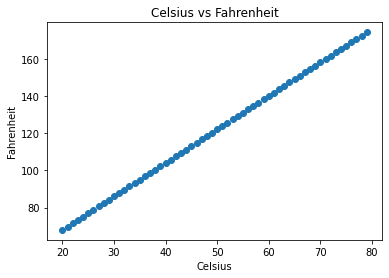

In [8]:
plt.scatter(X.values,Y.values)
plt.title("Celsius vs Fahrenheit")
plt.xlabel("Celsius")
plt.ylabel("Fahrenheit")
plt.show()

In [9]:
#Data Preprocessing
#Remove the missing value
#Scale numerical data type and Encode categorical data type
#Split the Data

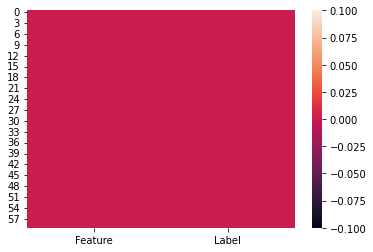

In [10]:
import seaborn as sns

sns.heatmap(df.isnull())
plt.show()


We have no empty values and moreover we have single feature and that belongs to Numerical Data type

In [15]:
#Scale the Numerical Data 

scale =(x−μ)/(σ)


where x is feature;
μ= mean; 
σ= standard deviation




In [18]:
#StandardScalar
class StandardScalar():
    def fit_transform(self,x):
        mean = np.mean(x)
        std_dev = np.std(x)
        return (x-mean)/std_dev

In [21]:
sc = StandardScalar()
x = sc.fit_transform(X)

In [22]:
x[:5]

0   -1.703420
1   -1.645677
2   -1.587934
3   -1.530191
4   -1.472448
Name: Feature, dtype: float64

In [23]:
type(x)

pandas.core.series.Series

In [26]:
Y = Y.values

In [27]:
y = sc.fit_transform(Y)

In [28]:
y

array([-1.7034199 , -1.64567685, -1.5879338 , -1.53019075, -1.47244771,
       -1.41470466, -1.35696161, -1.29921857, -1.24147552, -1.18373247,
       -1.12598942, -1.06824638, -1.01050333, -0.95276028, -0.89501723,
       -0.83727419, -0.77953114, -0.72178809, -0.66404504, -0.606302  ,
       -0.54855895, -0.4908159 , -0.43307286, -0.37532981, -0.31758676,
       -0.25984371, -0.20210067, -0.14435762, -0.08661457, -0.02887152,
        0.02887152,  0.08661457,  0.14435762,  0.20210067,  0.25984371,
        0.31758676,  0.37532981,  0.43307286,  0.4908159 ,  0.54855895,
        0.606302  ,  0.66404504,  0.72178809,  0.77953114,  0.83727419,
        0.89501723,  0.95276028,  1.01050333,  1.06824638,  1.12598942,
        1.18373247,  1.24147552,  1.29921857,  1.35696161,  1.41470466,
        1.47244771,  1.53019075,  1.5879338 ,  1.64567685,  1.7034199 ])

Split The Data

In [29]:
train_size = int(0.8*len(x))
# or test_size = int(0.2*len(x))

size = list(range(len(x)))
np.random.shuffle(size)
x = x[size]
y = y[size]

In [30]:
x[:10]

array([ 0.606302  ,  1.41470466, -1.35696161,  1.01050333,  1.64567685,
        1.12598942, -1.18373247, -0.31758676, -1.24147552,  0.77953114])

In [31]:
y[:10]

array([ 0.606302  ,  1.41470466, -1.35696161,  1.01050333,  1.64567685,
        1.12598942, -1.18373247, -0.31758676, -1.24147552,  0.77953114])

In [32]:
x_train = x[0:train_size].reshape(-1,1)
y_train = y[0:train_size].reshape(-1,1)
x_test = x[train_size:].reshape(-1,1)
y_test = y[train_size:].reshape(-1,1)

In [33]:
x_train.shape

(48, 1)

In [34]:
y_train.shape

(48, 1)

In [35]:
x_test.shape

(12, 1)

In [36]:
y_test.shape

(12, 1)

In [39]:
#Initialize Weights and Bias 
#Remember the shape for Weights and Bias are very cruical. The x is in form of (n,m) where n is number of n values and m is feature

In [40]:
# we shall first define initial values for Weights and Biases
m = x_train.shape[1]
W = 0.01 * np.random.randn(m,1)
b = np.zeros((1, 1))

In [41]:
W.shape

(1, 1)

In [42]:
b.shape

(1, 1)

In [37]:
#Train the Model

y^=W∗X+b

In [43]:
y_pred = np.dot(x_train,W) + b

In [44]:
y_pred.shape

(48, 1)

In [45]:
y_train.shape

(48, 1)

In [ ]:
#Calculate Loss And Cost Function

Formula:

J(θ)=MSE=1/N ∑Ni−1(yi−y^i)2

In [46]:
def loss(y_train,y_pred):
    N = len(y_train)
    loss = (1/N) * np.sum((y_pred - y_train)**2)
    return loss

In [47]:
#Gradient Descent

In [48]:
def optimize(W,b,x_train,y_train,learning_rate,y_pred):
    N = len(y_train)
    dW = -(2/N) * np.sum((y_train - y_pred) * x_train)
    db = -(2/N) * np.sum((y_train - y_pred))
    W += -learning_rate* dW
    b += -learning_rate* db
    
    grad = {"dW":dW,"db":db}
    update = {"W":W,"b":b}
    return grad,update

In [49]:
def predict(W,b,X):
    prediction = np.dot(X,W) + b
    return prediction

In [50]:
num_of_iterations = 201 #change and see this difference
learning_rate = 0.01
W = 0.01 * np.random.randn(m,1)
b = np.zeros((1, 1))

for i in range(num_of_iterations):
    y_pred = np.dot(x_train, W) + b
    loss_func = loss(y_train,y_pred)
    
    if i%20 == 0:
        print(f"Iteration:{i}, Loss: {loss_func}")
    
    gradient,change = optimize(W,b,x_train,y_train,learning_rate,y_pred)
    dW = gradient["dW"]
    db = gradient['db']
    W = change["W"]
    b = change["b"]
    train_predict = predict(W,b,x_train)
test_predict = predict(W,b,x_test)

Iteration:0, Loss: 0.9785209384557417
Iteration:20, Loss: 0.43607610761786303
Iteration:40, Loss: 0.1943972665877321
Iteration:60, Loss: 0.08668693921096766
Iteration:80, Loss: 0.038668089387937976
Iteration:100, Loss: 0.017253892235186155
Iteration:120, Loss: 0.007701165903007305
Iteration:140, Loss: 0.003438432741457944
Iteration:160, Loss: 0.0015356731363825552
Iteration:180, Loss: 0.0006860735906759378
Iteration:200, Loss: 0.0003066024781969071


Evaluation Metrics

In [51]:
train_mse = np.mean((y_train - train_predict) ** 2)
test_mse = np.mean((y_test - test_predict) ** 2)
print(f"Train MSE: {train_mse}, Test MSE: {test_mse}")

Train MSE: 0.0002945027734123545, Test MSE: 0.00030033269062596885


In [52]:
train_rmse = np.mean((y_train - train_predict) ** 2)
test_rmse = np.mean((y_test - test_predict) ** 2)
print(f"Train RMSE: {np.sqrt(train_rmse)}, Test RMSE: {np.sqrt(test_rmse)}")

Train RMSE: 0.017161083107203767, Test RMSE: 0.017330109365666705


In [53]:
def repeat(type_graph):
    plt.title(type_graph)
    plt.xlabel("Celsius")
    plt.ylabel("Fahrenheit")
    plt.legend(loc="lower right")

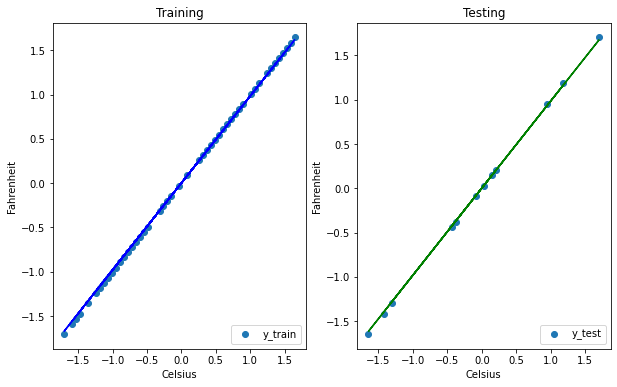

In [54]:

plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
plt.scatter(x_train, y_train,label="y_train")
plt.plot(x_train,train_predict, color="blue")
repeat("Training")

plt.subplot(1,2,2)
plt.scatter(x_test, y_test, label='y_test')
plt.plot(x_test, test_predict, color="green")
repeat("Testing")

# Show plots
plt.show()